---

**Author: [Dionísio Nhadelo]().**

---

<div class="alert alert-block alert-info">
    <b>Study Area</b>

The Data used for this project is large, hence could not upload them (a total of 1.4GB), but yo can download them from the [link](https://drive.google.com/drive/folders/1rYYKEHUcklF4cHDMBOO4P0pwVEMXaWhH?usp=drive_link)

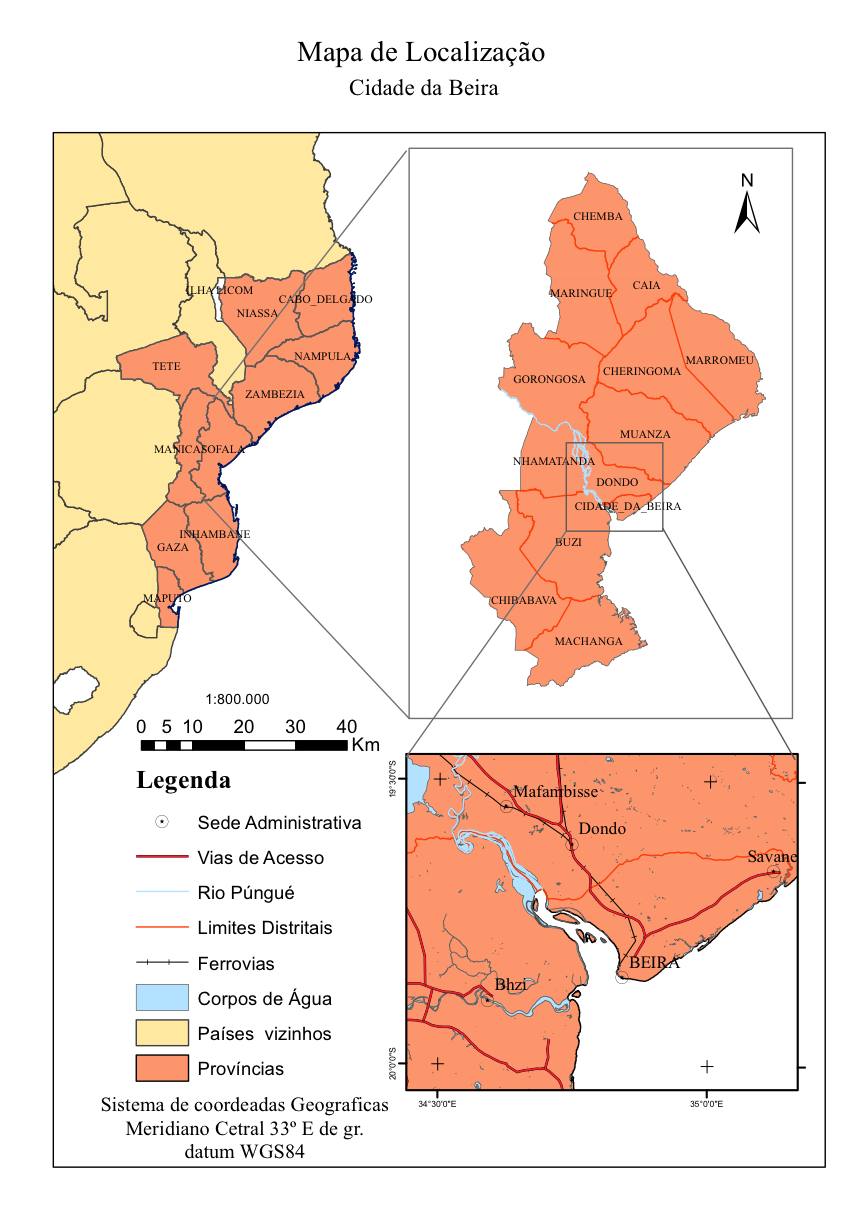

In [1]:
from IPython.display import Image
Image(filename='local de estudo.png') 

<div class="alert alert-block alert-info">
<b>General Objective:</b> 


The main objective of this work is to assess the quality of Sentinel-1 image data for identifying flooded areas or regions in the city of Beira following the occurrence of Tropical Cyclone Idai in March 2019.
</div>

---

---

### Reading the data:

First, let's import the libraries **numpy**, **matplotlib**, and **scikit-learn** for matrix manipulation, data processing, clustering, and visualization.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import KMeans
from sklearn import cluster, preprocessing

The following libraries will also be needed: [scikit-image](https://scikit-image.org), [pandas](https://pandas.pydata.org), [scipy](), and the [glob](https://docs.python.org/2/library/glob.html) module, which is already included in Python and does not need to be installed.

In [3]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
import pandas as pd
import scipy as sp
import glob

### Preparing the Data:

The instrument onboard the Sentinel-1 satellite transmits in one polarization (V) and measures in two polarizations (VV and VH), giving us the VV and VH bands. The first band of each image is the signal measured in the same polarization as the transmission (VV), and the second is measured in the orthogonal polarization (VH).

Due to the number of channels each pixel has (in this case, two channels per pixel), polarization does not yield satisfactory results that can be used in the work. Instead of performing polarization, I suggest visualizing the first three images (days 13, 14, and 19) to inspect and familiarize ourselves with the data. For example, from the images below, we can see that there is a black background around the images, which can be mistaken for water but actually represents null values or dead pixels (without value, usually represented as NA values). This data inspection will allow us to know which parts of the images we can work with, because if we do not remove these aspects before processing the data, we will encounter errors.

First, let's define the function <code>load_data</code> to read data from an input array (input numpy arrays).

In [4]:
def load_data(filename):
    
    im = np.load(filename)
    
    return im

Now let's define a second function that will calculate the *surface polarization* and add it to our dataset as a third axis. The *surface polarization* will result from the ratio between the polarizations of the first two bands.

In [5]:
def data_preprocess(data_array):
    
    processed_data = np.zeros((4024, 3745, 3))
    
    processed_data[:,:,0] = data_array[:,:,0]
    processed_data[:,:,1] = data_array[:,:,1]
    processed_data[:,:,2] = data_array[:,:,0]/data_array[:,:,1]
    
    return processed_data


#np.shape(data_array)

Since our dataset is composed of six images, we will use the [glob]() library to read all the data at once.

In [6]:
radar_data=glob.glob('data/2019*.npy')
print(radar_data)

['data/20190313T161522.npy', 'data/20190314T030905.npy', 'data/20190319T161451.npy', 'data/20190320T030813.npy', 'data/20190325T161548.npy', 'data/20190326T030905.npy']


We will use the _sort_ method to organize our data list in ascending order based on the date the images were captured.

In [7]:
radar_data.sort()
print(radar_data)

['data/20190313T161522.npy', 'data/20190314T030905.npy', 'data/20190319T161451.npy', 'data/20190320T030813.npy', 'data/20190325T161548.npy', 'data/20190326T030905.npy']


Now let's store each data item from our list in variables corresponding to each day the images were captured.

In [8]:
dia13 = load_data(radar_data[0])
dia14 = load_data(radar_data[1])
dia19 = load_data(radar_data[2])
dia20 = load_data(radar_data[3])
dia25 = load_data(radar_data[4])
dia26 = load_data(radar_data[5])

In [9]:
dia13.shape

(4024, 3745, 2)

We can now apply our <code>preprocessing</code> function to add the surface polarization to each of the images we read above.

In [10]:
dia_13_preprocessed = data_preprocess(dia13)
dia_14_preprocessed = data_preprocess(dia14)
dia_19_preprocessed = data_preprocess(dia19)
dia_20_preprocessed = data_preprocess(dia20)
dia_25_preprocessed = data_preprocess(dia25)
dia_26_preprocessed = data_preprocess(dia26)

<ipython-input-5-603e62fc658a>:7: RuntimeWarning: invalid value encountered in true_divide
  processed_data[:,:,2] = data_array[:,:,0]/data_array[:,:,1]


In [11]:
dia_13_preprocessed.shape

(4024, 3745, 3)

---

### Visualizing the Data:

Let's visualize the data to see how it looks. As a first step, we can choose one of the images from our dataset; in this case, I chose the image from **May 13, 2019**. After selecting the image, I will visualize the data in the following pixel range: [580:3510, 550:3200].

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


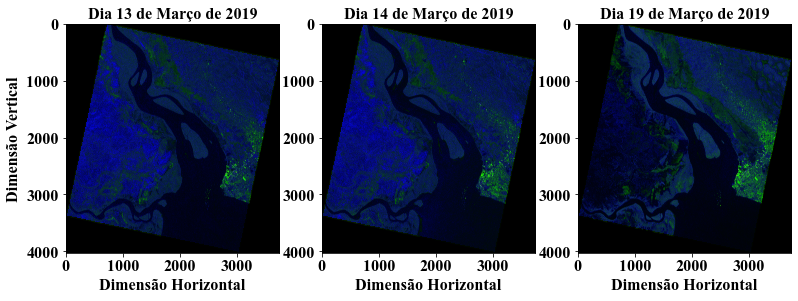

In [12]:
fontsize = 16
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = fontsize
plt.rcParams["axes.titlesize"] = fontsize
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (13,8))
axes[0].imshow(dia_13_preprocessed,'viridis')
axes[0].set_ylabel("Dimensão Vertical", fontweight = 'bold')
axes[0].set_xlabel("Dimensão Horizontal", fontweight = 'bold')
axes[0].set_title("Dia 13 de Março de 2019", fontweight = 'bold')

#f = plt.figure(figsize = (20,20))

#f.add_subplot(131)
#plt.imshow(dia_13_preprocessed,'viridis')
#plt.title('dia13')
axes[1].imshow(dia_14_preprocessed,'viridis')
axes[1].set_ylabel("")
axes[1].set_xlabel("Dimensão Horizontal", fontweight = 'bold')
axes[1].set_title("Dia 14 de Março de 2019", fontweight = 'bold')
# f.add_subplot(132)
# plt.imshow(dia_14_preprocessed,'viridis')
# plt.title('dia14')

axes[2].imshow(dia_19_preprocessed,'viridis')
axes[2].set_ylabel("")
axes[2].set_xlabel("Dimensão Horizontal", fontweight = 'bold')
axes[2].set_title("Dia 19 de Março de 2019", fontweight = 'bold')
# f.add_subplot(133)
# plt.imshow(dia_19_preprocessed,'viridis')
# plt.title('dia19')

plt.savefig("Visualização dos dados.png")
plt.show()

We need to define a sub-region of one of the images to use as our input training data for the model.

In [13]:
dia13_training = dia_13_preprocessed[1700:3400,700:3100,:]

Now let's define a second sub-region for all images; this data will be used for testing. The chosen region was: [[580:1700, 550:2000, :]]().

In [14]:
dia13_test = dia_13_preprocessed[580:1700,600:2000,:]
dia14_test = dia_14_preprocessed[580:1700,600:2000,:]
dia19_test = dia_19_preprocessed[580:1700,600:2000,:]
dia20_test = dia_20_preprocessed[580:1700,600:2000,:]
dia25_test = dia_25_preprocessed[580:1700,600:2000,:]
dia26_test = dia_26_preprocessed[580:1700,600:2000,:]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


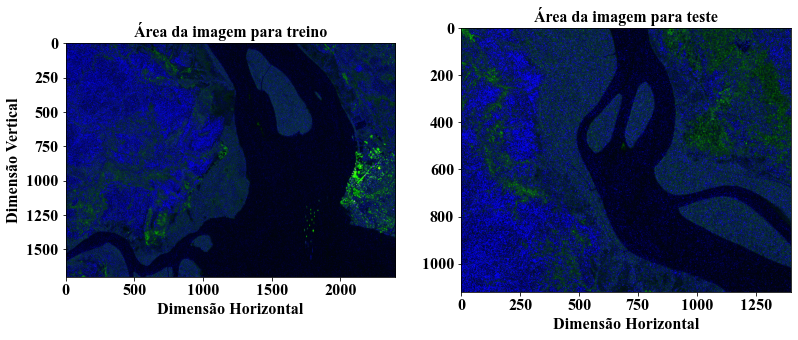

In [15]:
plt.imshow


fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (13,9))

axes[0].imshow(dia13_training, 'viridis')
axes[0].set_ylabel("Dimensão Vertical", fontweight = 'bold')
axes[0].set_xlabel("Dimensão Horizontal", fontweight = 'bold')
axes[0].set_title("Área da imagem para treino", fontweight = 'bold')
#plt.text(-2800,150, 'a)', fontsize=20, fontweight='bold')



axes[1].imshow(dia13_test, 'viridis')
axes[1].set_xlabel("Dimensão Horizontal", fontweight = 'bold')
axes[1].set_title("Área da imagem para teste", fontweight = 'bold')
#plt.text(100,150, 'b)', fontsize=20, fontweight='bold')


plt.savefig("area de treino e teste.png")
plt.show()

---

### Data Segmentation:

Now we’ll use the [segmentation](https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.slic) module from the [scikit-image](http://scikit-image.org/docs/dev/api/skimage.segmentation.html) library to create segments of the images. Each segment will be treated as a **superpixel**. We will calculate statistical metrics for each superpixel and then use this information as input data for the K-means algorithm.

The <code>calculate_segment_stats</code> function will calculate:

* the minimum value,
* the maximum value,
* the mean,
* the variance,
* the skewness, and
* the kurtosis

for each superpixel in each channel.

In [77]:
number_segments = 50000
segments = slic(dia13_training, n_segments = number_segments, compactness = 50, sigma = 0, convert2lab = False)

<ipython-input-77-e3a7a690e204>:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(dia13_training, n_segments = number_segments, compactness = 50, sigma = 0, convert2lab = False)


In [78]:
# plt.figure(figsize=(15,15))
# plt.imshow(mark_boundaries(dia13_training[:,:]/255, segments))
# #plt.savefig("Segmentação dos dados de treino.png")
# plt.show()

In [79]:
def calculate_segment_stats(data, segments):
    
    # turn the image into a 2D array (pix by channel)
    d1_flat = pd.DataFrame(np.ravel(data).reshape((-1,3)))

    # add the label vector
    d1_flat['spID'] = np.ravel(segments)

    # calculate the mean by segment
    return d1_flat.groupby('spID').mean().values

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


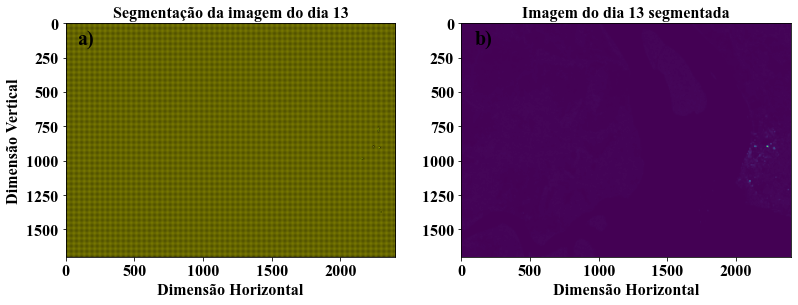

In [80]:

#b = plt.figure(figsize = (20,20))

#b.add_subplot(121)
#plt.imshow(mark_boundaries(dia13_training[:,:]/255, segments))
#plt.imshow(mark_boundaries(dia13_training[:,:]/255, segments))
#plt.title('dia13')


fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (13,9))
#axes[0].
axes[0].imshow(mark_boundaries(dia13_training[:,:]/255, segments))
axes[0].set_ylabel("Dimensão Vertical", fontweight = 'bold')
axes[0].set_xlabel("Dimensão Horizontal", fontweight = 'bold')
axes[0].set_title("Segmentação da imagem do dia 13", fontweight = 'bold')
plt.text(-2800,150, 'a)', fontsize=20, fontweight='bold')
#b = plt.figure(figsize = (20,20))

#b.add_subplot(122)
#plt.imshow(dia_13_preprocessed,'viridis')
#plt.title('dia13')
#########
seg_means = calculate_segment_stats(dia13_training,segments)

axes[1].imshow(seg_means[:,0][segments])
#axes[1].set_ylabel("Dimensão Vertical", fontweight = 'bold')
axes[1].set_xlabel("Dimensão Horizontal", fontweight = 'bold')
axes[1].set_title("Imagem do dia 13 segmentada", fontweight = 'bold')
plt.text(100,150, 'b)', fontsize=20, fontweight='bold')
#axes[1].set_labelweight(axes.labelweight = "bold")
#plt.rcParams["axes.labelweight"] = "bold"

plt.savefig("Segmentação dos dados de treino.png")
plt.show()
###########

#plt.figure(figsize=(15,15))
# broadcast the mean pixel values from the first channel
# to the same shape as the original image array
#plt.figure(figsize=(15,15))
#plt.imshow(mark_boundaries(dia13_training[:,:]/255, segments))
#plt.imshow(seg_means[:,0][segments])
#plt.savefig("Estatísticas dos dados de teste.png")

---

### Clustering the Data:

Now we will apply the K-means clustering method to the training data we created. To find an optimal number of classes, we will use the *Elbow method*. We’ll consider three as an optimal number of classes. This method will use the statistical information obtained during segmentation to determine the optimal number of classes, corresponding to the "elbow" point on the graph.

We can now apply segmentation classification to all pixels within each superpixel.

In [81]:
df = pd.DataFrame(seg_means)
seg_means = df.dropna()
distortions = []

K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(seg_means)
    distortions.append(kmeanModel.inertia_)

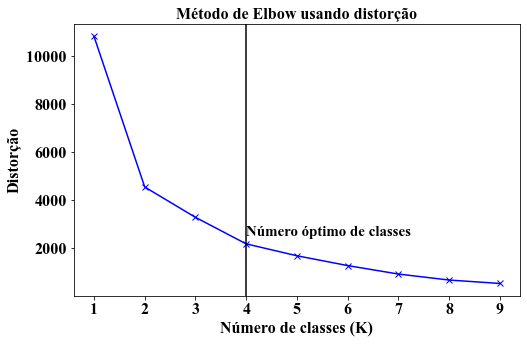

In [82]:
plt.figure(figsize = (8,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de classes (K)', fontweight ='bold')
plt.ylabel('Distorção', fontweight = 'bold')
plt.title('Método de Elbow usando distorção', fontweight = 'bold')

plt.axvline(x=4, color = 'k', label = '')
plt.text(4,2500, 'Número óptimo de classes', fontsize=15.0, fontweight='bold')
plt.savefig("Determinacao do numero de classes.png")
plt.show()


We take the value corresponding to the optimal number of classes and substitute it below.

In [83]:
df = pd.DataFrame(seg_means)
seg_means = df.dropna()

kmeans_4clusters = cluster.KMeans(n_clusters = 4)
kmeans_4clusters.fit(seg_means)

KMeans(n_clusters=4)

Now let's display the area color-coded for each class.

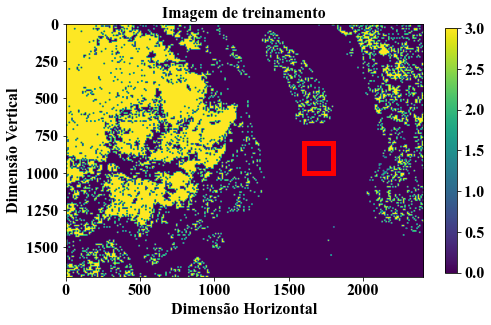

In [84]:
# this is the bit that displays the figure:
plt.figure(figsize = (8,6))
plt.imshow(kmeans_4clusters.labels_[segments],'viridis')
plt.colorbar(shrink=0.75)
plt.title("Imagem de treinamento", fontweight='bold')
plt.xlabel("Dimensão Horizontal", fontweight ='bold')
plt.ylabel("Dimensão Vertical", fontweight = 'bold')

# this is the bit that adds the rectangle:
rect = mpl.patches.Rectangle((1600,800),200,200,linewidth = 5,edgecolor = 'r',facecolor = 'none')
ax = plt.gca()
ax.add_patch(rect)

plt.savefig("Agrupamento dos dados de treino.png")

You can see from the figure above that I've put the rectangle over an area of the image which I'm pretty certain is water.

---

### Using the Data to Monitor Floods:

From the image above, it is already known that the red rectangle marks an area containing water. Now we want to determine if this area will be classified as water after applying the K-means classification algorithm.

If we examine the pixel group in the color scale, we can verify that the model classified the area within the rectangle as water. For this calculation, we will use the <code>mode</code> function from the [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html) library.

In [85]:
training = kmeans_4clusters.labels_[segments][250:270,2300:2500]
water_label = int(sp.stats.mode(training, axis=None).mode)
print('O valor correspondente a água é: ',water_label)

O valor correspondente a água é:  0


Now let's apply the previous procedures to a larger area. To do this, we will define a <code>predict</code> function to classify the new data. We pass the data and the model to the <code>predict</code> function.

In [86]:
def predict(data, model, number_segments=number_segments):
    
    """ 
    Function to return labelled image
    """
    
    # segment the image
    test_segments = slic(data,
                         n_segments=number_segments,
                         compactness=50,
                         sigma = 0,
                         convert2lab=False)
    
    # calculate seg stats 
    test_set = calculate_segment_stats(data,test_segments)
    
    # predict
    test_set_segment_labels=model.predict(test_set)
    
    # code via broadcasting
    return test_set_segment_labels[test_segments]

We can then apply this to new areas:

In [87]:
dia13_labels=predict(dia13_test,kmeans_4clusters)
dia14_labels=predict(dia14_test,kmeans_4clusters)
dia19_labels=predict(dia19_test,kmeans_4clusters)
dia20_labels=predict(dia20_test,kmeans_4clusters)
dia25_labels=predict(dia25_test,kmeans_4clusters)
dia26_labels=predict(dia26_test,kmeans_4clusters)

<ipython-input-86-12cf894b5995>:8: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  test_segments = slic(data,
<ipython-input-86-12cf894b5995>:8: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  test_segments = slic(data,
<ipython-input-86-12cf894b5995>:8: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  test_segments = slic(data,
<ipython-input-86-12cf894b5995>:8: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  test_segments = slic(data,
<ipython-input-86-12cf894b5995>:

Let's display the results to see how it looks:

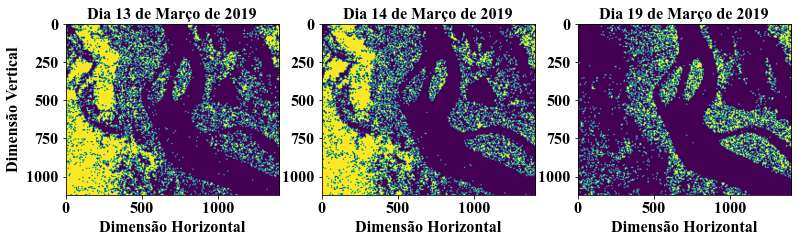

In [88]:
fontsize = 16
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (13,9))

axes[0].imshow((dia13_labels), cmap='viridis')
axes[0].set_ylabel("Dimensão Vertical", fontweight = 'bold')
axes[0].set_xlabel("Dimensão Horizontal", fontweight = 'bold')
axes[0].set_title("Dia 13 de Março de 2019", fontweight = 'bold')

axes[1].imshow((dia14_labels), cmap='viridis')
axes[1].set_ylabel("", fontweight = 'bold')
axes[1].set_xlabel("Dimensão Horizontal", fontweight = 'bold')
axes[1].set_title("Dia 14 de Março de 2019", fontweight = 'bold')


axes[2].imshow((dia19_labels))# cmap='viridis')
axes[2].set_ylabel("", fontweight = 'bold')
axes[2].set_xlabel("Dimensão Horizontal", fontweight = 'bold')
axes[2].set_title("Dia 19 de Março de 2019", fontweight = 'bold')


# f = plt.figure(figsize=(15,15))

# f.add_subplot(131)
# plt.imshow(dia13_labels)
# plt.title("Dia 13 de Março de 2019", fontweight = 'bold')

# f.add_subplot(132)
# plt.imshow(dia14_labels)
# plt.title("Dia 14 de Março de 2019", fontweight = 'bold')

# f.add_subplot(133)
# plt.imshow(dia19_labels)
# plt.title("Dia 19 de Março de 2019", fontweight = 'bold')



plt.savefig("Resultados dos dados de teste131419.png")
plt.show()

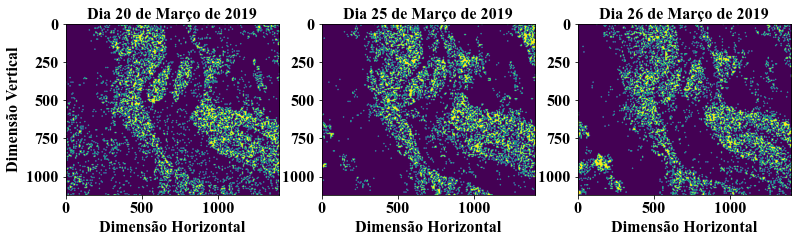

In [89]:
fontsize = 16
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (13,9))

axes[0].imshow((dia20_labels), cmap='viridis')
axes[0].set_ylabel("Dimensão Vertical", fontweight = 'bold')
axes[0].set_xlabel("Dimensão Horizontal", fontweight = 'bold')
axes[0].set_title("Dia 20 de Março de 2019", fontweight = 'bold')

axes[1].imshow((dia25_labels), cmap='viridis')
axes[1].set_ylabel("", fontweight = 'bold')
axes[1].set_xlabel("Dimensão Horizontal", fontweight = 'bold')
axes[1].set_title("Dia 25 de Março de 2019", fontweight = 'bold')


axes[2].imshow((dia26_labels), cmap='viridis')
axes[2].set_ylabel("", fontweight = 'bold')
axes[2].set_xlabel("Dimensão Horizontal", fontweight = 'bold')
axes[2].set_title("Dia 26 de Março de 2019", fontweight = 'bold')

# f = plt.figure(figsize=(15,15))

# f.add_subplot(331)
# plt.imshow(dia20_labels)
# plt.title("Dia 20 de Março de 2019", fontweight = 'bold')



# f.add_subplot(332)
# plt.imshow(dia25_labels)
# plt.title("Dia 25 de Março de 2019", fontweight = 'bold')



# f.add_subplot(333)
# plt.imshow(dia26_labels)
# plt.title("Dia 26 de Março de 2019", fontweight = 'bold')



plt.savefig("Resultados dos dados de teste202526.png")
plt.show()

Using the water cluster label to produce boolean arrays of 'water' at 2 time points and the NumPy logic functions, we can identify areas of water that were not present before the hurricane and were present afterwards.

In [90]:
dia13_water = dia13_labels == water_label
dia14_water = dia14_labels == water_label
dia19_water = dia19_labels == water_label
dia20_water = dia20_labels == water_label
dia25_water = dia25_labels == water_label
dia26_water = dia26_labels == water_label

We can visualize the difference using the logical [exclusive or ('XOR')](https://en.wikipedia.org/wiki/Exclusive_or) function.

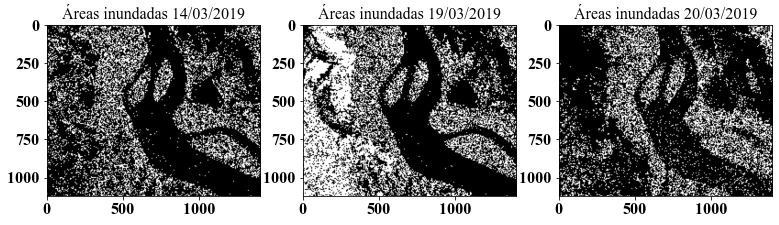

In [107]:
flooding1 = np.logical_xor(dia13_water, dia14_water)
flooding2 = np.logical_xor(dia14_water,dia19_water)
flooding3 = np.logical_xor(dia19_water,dia20_water)
flooding4 = np.logical_xor(dia20_water,dia25_water)
flooding5 = np.logical_xor(dia25_water,dia26_water)
flooding6 = np.logical_xor(dia13_water,dia26_water)

f = plt.figure(figsize=(13,9))

f.add_subplot(131)
plt.imshow(flooding1,'binary_r')
plt.title('Áreas inundadas 14/03/2019')

f.add_subplot(132)
plt.imshow(flooding2,'binary_r')
plt.title('Áreas inundadas 19/03/2019')

f.add_subplot(133)
plt.imshow(flooding3,'binary_r')
plt.title('Áreas inundadas 20/03/2019')







plt.savefig("XOR1.png")
plt.show()

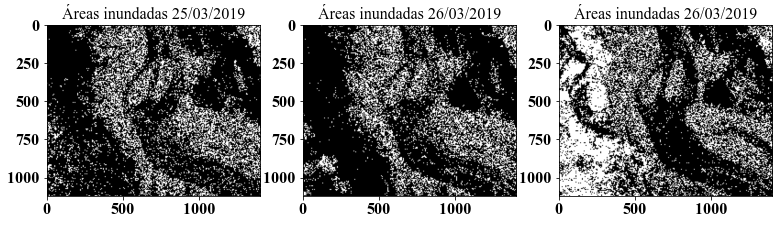

In [108]:
f = plt.figure(figsize=(13,9))
f.add_subplot(131)
plt.imshow(flooding4,'binary_r')
plt.title('Áreas inundadas 25/03/2019')

f.add_subplot(132)
plt.imshow(flooding5,'binary_r')
plt.title('Áreas inundadas 26/03/2019')

f.add_subplot(133)
plt.imshow(flooding6,'binary_r')
plt.title('Áreas inundadas 26/03/2019')

plt.savefig("XOR2.png")
plt.show()

$$Fim$$

---
<div class="alert alert-block alert-info">
    <b>Copyright &copy; 2021. Dionísio Nhadelo.  All rights reserved.</b>
</div>


<div class="alert alert-block alert-info">
    <b>Contact:

dionisiocandido1@gmail.com</b>